In [1]:
%load_ext autoreload
%autoreload 2
from fun import *
os.environ['QT_QPA_PLATFORM']='offscreen'

##### We will study the evolutionary history of the AKAP79 protein, first, by looking at this protein in different species.

### Select model species from the ToL

qt.gui.icc: Unsupported ICC profile class 73636e72


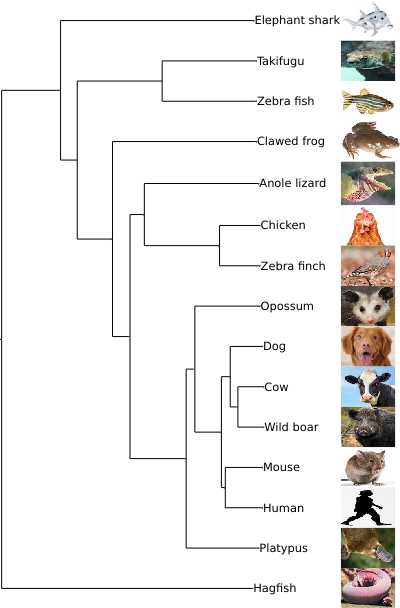

In [2]:
# Downloaded tree from timetreeoflife.org
nwk_direct = 'nwk_trees/model_species.nwk'
ts, t = render_phylogeny(nwk_direct, layout_tol)
t.render("%%inline", w=400, tree_style = ts) 

##### Are these species homologous?
### AKAP79 human homologies

In [3]:
akap5_human = {fasta.id:str(fasta.seq) for fasta in SeqIO.parse(open("fasta_files/Homo_sapiens_AKAP5_sequence.fa"),'fasta')}

In [ ]:
# already in direct
for order, order_id in NCBI_order_ids().items():
    result_temp_handle = NCBIWWW.qblast("blastp", "nr",
                                        akap5_human['AKAP5-202'],
                                        entrez_query = 'txid' + order_id + '[ORGN]')
    with open("blast_results/homo_sapiens_akap79/" + str(order) + ".xml", 'w') as f:
        f.write(result_temp_handle.getvalue())

In [4]:
order_list = list((NCBI_order_ids().keys()))
blast_results = [read_blast_into_dict("blast_results/homo_sapiens_akap79/" + order + ".xml") for order in order_list]

hits_species_dict = {}
for result in blast_results:
    for hit_dict in result.values():
        if hit_dict['specie'] not in hits_species_dict:
            hits_species_dict[hit_dict['specie']] = []
        hits_species_dict[hit_dict['specie']].append((hit_dict['name'],hit_dict['e-value']))
        

In [5]:
generate_blast_df(species_host_to_guest_map_dic(), hits_species_dict)

specie  \
specie                                                  
Anolis carolinensis      13       Anolis carolinensis   
Bos taurus               5                 Bos taurus   
                         7                 Bos taurus   
                         4                 Bos taurus   
                         6                 Bos taurus   
Canis lupus              8                Canis lupus   
Gallus gallus            11             Gallus gallus   
                         12             Gallus gallus   
Monodelphis domestica    9      Monodelphis domestica   
Mus musculus             1               Mus musculus   
                         2               Mus musculus   
                         0               Mus musculus   
Ornithorhynchus anatinus 10  Ornithorhynchus anatinus   
Sus scrofa               3                 Sus scrofa   
Taeniopygia guttata      14       Taeniopygia guttata   
Xenopus tropicalis       15        Xenopus tropicalis   

                                                             name  \
specie                                                              
Anolis carolinensis      13  PREDICTED: A-kinase anchor protein 5   
Bos taurus               5              A-kinase anchor protein 5   
                         7              A-kinase anchor protein 5   
                         4   A-kinase anchor protein 5 isoform X1   
                         6           binding protein P75, partial   
Canis lupus              8              A-kinase anchor protein 5   
Gallus gallus            11             A-kinase anchor protein 5   
                         12             A-kinase anchor protein 5   
Monodelphis domestica    9   PREDICTED: A-kinase anchor protein 5   
Mus musculus             1              A-kinase anchor protein 5   
                         2   A-kinase anchor protein 5 isoform X1   
                         0                               mCG52906   
Ornithorhynchus anatinus 10             A-kinase anchor protein 5   
Sus scrofa               3              A-kinase anchor protein 5   
Taeniopygia guttata      14             A-kinase anchor protein 5   
Xenopus tropicalis       15             A-kinase anchor protein 5   

                                   e-value  
specie                                      
Anolis carolinensis      13   1.044260e-09  
Bos taurus               5    0.000000e+00  
                         7    0.000000e+00  
                         4    0.000000e+00  
                         6   3.387900e-127  
Canis lupus              8    0.000000e+00  
Gallus gallus            11   1.565560e-11  
                         12   1.756760e-11  
Monodelphis domestica    9   6.363680e-131  
Mus musculus             1    3.158840e-83  
                         2    5.122430e-83  
                         0    2.360610e-83  
Ornithorhynchus anatinus 10   4.437330e-77  
Sus scrofa               3    0.000000e+00  
Taeniopygia guttata      14   2.659180e-10  
Xenopus tropicalis       15   5.145060e-04

### Can we find AKAP79 human homologies in fish? 

We will look at:
* Bony fishes
* Cartilaginous fishes

##### All AKAP79 protein sequences in the selected model species are  human orthologs, with fish being the only exception.

In [ ]:
# already in direct
for taxa, taxa_id in {'bony_fishes':'7898', 'cartilaginous_fishes': '7777'}.items():
    result_temp_handle = NCBIWWW.qblast("blastp", "nr",
                                        akap5_human['AKAP5-202'],
                                        entrez_query = 'txid' + taxa_id + '[ORGN]')
    with open("blast_results/" + str(taxa) + ".xml", 'w') as f:
        f.write(result_temp_handle.getvalue())

In [7]:
blast_results = [read_blast_into_dict("blast_results/" + order + ".xml") for order in ['bony_fishes', 'cartilaginous_fishes']]

hits_species_dict = {}
for result in blast_results:
    for hit_dict in result.values():
        if hit_dict['specie'] not in hits_species_dict:
            hits_species_dict[hit_dict['specie']] = []
        hits_species_dict[hit_dict['specie']].append((hit_dict['name'],hit_dict['e-value']))
        

In [8]:
hits_species_dict

{}

##### The absence of AKAP79 in fish may indicate that AKAP79 was not part of early vertebrates.

 - Since we know AKAP79 is important for human synapses, and fish have synapses, we expected to find AKAP79 in fish.
- What could this mean?
    * That some functions of AKAP79 are not important for fish and they can survive without it.
    * That there is another protein performing the same function as AKAP79 in humans.

### Infer tree using the Jprime tool and DLRS model

In [9]:
## Multiple Sequence Alignment using MUSCLE
seq_filename = 'fasta_files/akap5_seq_prot.fa'
msa_filename = 'fasta_files/msa/akap5_seq_align_prot.fa'

In [ ]:
#already in direct
subprocess.call(["muscle","-in", seq_filename, "-out", msa_filename], 
                stdout=subprocess.DEVNULL,
                stderr=subprocess.STDOUT)

In [10]:
akap5_prot_seqs = {fasta.id:str(fasta.seq) for fasta in SeqIO.parse(open(seq_filename),'fasta')}

In [11]:
# specify files directory
guest2host_map_file = "jprime_files/input/guest2host_akap5_model_species.map"
out_file = "jprime_files/output/akap5_model_species.mcmc"
host_tree_file = "nwk_trees/model_species_tol_with_stem_edge_time.nwk"

In [ ]:
### already in directory
# Generate guest to host map file.
with open(guest2host_map_file, "w") as guest2host:
    for guest in list(akap5_prot_seqs.keys()):
        host = guest
        if '_akap5' in guest:
            host = guest.split('_akap5')[0]
        guest2host.write(guest + "\t" + host + "\n")
# Run DLRS model in jPrime
subprocess.call(["java", "-jar", "jprime-0.3.6.jar", "Delirious", 
                 "-o", out_file, "-i", "10000", #Number of iterations
                 "-sm", "JTT",
                 host_tree_file, msa_filename, guest2host_map_file], 
                stdout=subprocess.DEVNULL,
                stderr=subprocess.STDOUT)

### Infered tree using jPrime - DLRS model

In [12]:
chain = pd.read_table(out_file)
tree_filename = "jprime_files/output/DLRS_akap5_model_species_hom_tree.nwk"
dtree = dendropy.Tree.get_from_string(chain['GuestTree'].iloc[-1], "newick")
dtree.write_to_path(tree_filename, "newick", suppress_rooting=True)

In [13]:
ts, t = render_phylogeny(tree_filename, layout_tol)
for node in t.iter_descendants():
    node.dist*=30

##### The phylogeny of the akap5 protein sequences agrees with the tree of life.

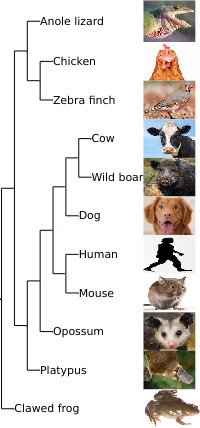

In [14]:
t.render("%%inline", w=200, tree_style = ts) 

### Infered tree using iqtree

In [ ]:
# Max-Likelihood phylogenetic tree using IQTREE with bootstrap
subprocess.call(["iqtree2", "-s", msa_filename, '-nt', 'AUTO'], 
                stdout=subprocess.DEVNULL,
                stderr=subprocess.STDOUT)

In [ ]:
ts, t = render_phylogeny('iqtree_files/iqtree_akap5_model_species_hom_tree.nwk', layout_tol)
for node in t.iter_descendants():
    node.dist*=30

In [ ]:
# Notes:
# - The msa returned by muscle changes depending on the version - why? - not nice!